This is the notebook for the polish data of week2.

These are the goals:

1. Train the baseline models
- Altman Z-score
- Ohlsen O-score

2. Train the ML models
- Random Forest
- XGBoost
- Logistic Regression

3. Adress the class weights
- SMOTE (teacher feedback)

4. Evaluate the model

Load the cleaned and winsorized data of yaer 5 it contains:
- 64 financial ratios
- traget column bankruptcy


In [74]:
import pandas as pd
url = "https://raw.githubusercontent.com/Vincent2308/Corporate-Bankruptcy/refs/heads/main/data/clean/polish/polish_bankruptcy_year5_winsorized.csv"
df = pd.read_csv(url)
df.head()

,net_profit_to_total_assets,total_liabilities_to_total_assets,working_capital_to_total_assets,current_assets_to_shortterm_liabilities,cash_flow_to_operating_expenses,retained_earnings_to_total_assets,ebit_to_total_assets,equity_to_total_liabilities,sales_to_total_assets,equity_to_total_assets,...,sales_minus_cogs_to_sales,current_minus_inventory_minus_stli_to_salesminusprofitminusdep,total_costs_to_total_sales,longterm_liabilities_to_equity,sales_to_inventory,sales_to_receivables,shortterm_liabilities_to_sales_days,sales_to_shortterm_liabilities,sales_to_fixed_assets,bankrupt
0,0.088238,0.55472,0.01134,1.0205,-66.520,0.34204,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0
1,0.048179,0.55041,0.10765,1.2437,-22.959,0.00000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0
2,0.099486,0.59991,0.37489,1.6529,19.036,0.21084,0.123950,0.66690,1.0972,0.40009,...,0.088581,0.248660,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.64500,0
3,0.078518,0.20546,0.10393,2.7939,77.784,0.36515,0.093388,3.86720,1.2322,0.79454,...,0.188420,0.098822,0.81158,0.185660,11.3790,3.1692,53.575,6.8129,0.47096,0
4,0.125040,0.35440,0.31419,2.7127,17.942,0.30575,0.158430,1.82170,1.2362,0.64560,...,0.191090,0.193680,0.80891,0.264790,4.7737,5.7479,59.841,6.0995,2.22740,0


Train-test split
This is used to test the ML algorithm and data it has not seen before. It trains the model on the majority of the data, and tests it on the remaining part. It prevents overfitting, because it prevents the model memorizing the training data.

Important that this is done at the very begining!

https://builtin.com/data-science/train-test-split

https://www.youtube.com/watch?v=4YAq-vCDnKk


Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [76]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["bankrupt"])
y = df['bankrupt']

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, stratify =y, random_state = 42)

### Scaling

Write a part about what scaling does and why only on x.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc  = scaler.transform(x_test)

### SMOTE

As mentioned by the lecturer, we should/ could look into SMOTE.

This is because there is a class imbalance, since bankruptcy only occurs arround 3% of the time. This is important since otherwise the model could always predict non-bankruptcy. 

Here is a simplified version how it works:
1. It selects random points from the minority class (bankruptcy)
2. It selects n amount of neighbors, within this minority class.
3. For each of the selected neighbors
4. Repeat this process.

For a more detailed explenation:
https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c


A explenation of how the SMOTE function can be created from 'scratch' can also be found at: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

However, a library can also be used: https://www.geeksforgeeks.org/machine-learning/smote-for-imbalanced-classification-with-python/

Documentation: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_sc_sm, y_train_sm, = smote.fit_resample(x_train, y_train)


To evaluate each each model, we can write a function that allows us the evaluate it easier and only write some code once.

But we first have to decide what the models should be evaluated on: 
1. Accuracy. Pretty straight forward: (correct prediction)/(total predictions). But if 3% of the firms go bankrupt, and it predicts everyone survives. It is only 97% accurate.
2. Precision: of the predicted bakruptcy, how many are correct? But we need more since it could be very precise, but almost never actually predict a bankruptcy.
3. Recall (important in ML): how many actual bankruptcies did we correctly predict. 

More detailed explenation of point 2&3: https://www.geeksforgeeks.org/machine-learning/precision-and-recall-in-machine-learning/

4. F1-score: calculated the harmonic mean between the precision and recall.

https://www.geeksforgeeks.org/machine-learning/f1-score-in-machine-learning/


Another way of checking the results if a ROC AUC curve. This check how well a binary model works. It measures how well the model seperates bankrupt vs non-bankrupt firms. 

https://www.geeksforgeeks.org/machine-learning/auc-roc-curve/

Lucky for us, scikit-learn has methods for almost all these test. And scikit also has neat way to plot the ROC curve.


In [101]:
#IMPORTS
from sklearn.metrics import(accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,)
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


def evaluate_model(model, x_test_sc, y_test):
    # evaluate the mdodel based on the previoulsy chosen metrics

    y_pred = model.predict(x_test_sc)

    # gets the predicted probability the the sample belongs to bankrupt = 1
    y_prob = model.predict_proba(x_test_sc)[:,1]

    #metrics
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # print results
    print(f' Accuracy: {acc:.3f}')
    print(f' Precision: {pre:.3f}')
    print(f'Recall: {rec:.3f}')
    print(f'F1-Score: {f1:.3f}')
    print(f' AUC Score: {auc:.3f}')


    RocCurveDisplay.from_estimator(model, x_test_sc, y_test)
    plt.show()




Start with the classical models: Altman Z-score & Ohlsen O-score

Unfortunately market value is not available in the data set since it only contains ratios.

In [28]:
Z = (
    1.2 * df["working_capital_to_total_assets"] +
    1.4 * df["retained_earnings_to_total_assets"] +
    3.3 * df["ebit_to_total_assets"] + 
    1.0 * df["total_sales_to_total_assets"]
)
df["Z-score"] = Z

In [34]:
roc_auc_score(y, df["Z-score"])

0.32334029548999527

In [39]:
import numpy as np
O = (
    -1.32
    #
    +6.03* df["total_liabilities_to_total_assets"]
    -1.43 * df["working_capital_to_total_assets"]
    +0.0757 * df["current_assets_to_shortterm_liabilities"]**-1
    -1.72 * (df["total_liabilities_to_total_assets"] > 1).astype(int)
    -2.37 * df["net_profit_to_total_assets"]
    #
    #
    #

)
df["O-score"] = O

In [40]:
roc_auc_score(y, df["O-score"])

0.7833279778282087

The formulas had to be altered, since not al the data was available in the dataset.

### Logistic Regression




In [ ]:
# first we train the model as is, so withouh SMOTE.
# we can again import a function from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500, class_weight = "balanced")
lr.fit(x_train, y_train)

/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


We run into a error. So lets first try scaling the data, and after that increasing the number of intteration.

This should be done before callling SMOTE

In [96]:
lr = LogisticRegression(max_iter=2000, class_weight="balanced")
lr.fit(x_train_sc, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


It appears to have worked :) 

 Accuracy: 0.168
 Precision: 0.020
Recall: 0.500
F1-Score: 0.038
 AUC Score: 0.325


/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


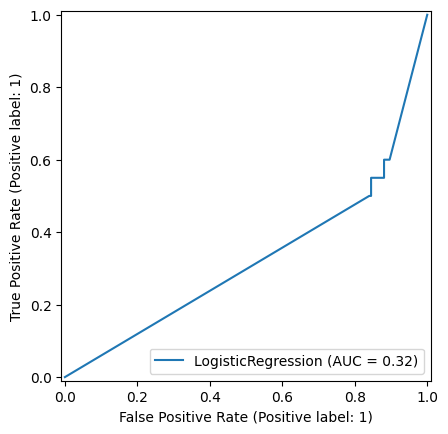

In [97]:
evaluate_model(lr, x_test, y_test)

Now we do the same, but using SMOTE

 Accuracy: 0.540
 Precision: 0.067
Recall: 1.000
F1-Score: 0.125
 AUC Score: 0.937


/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature 

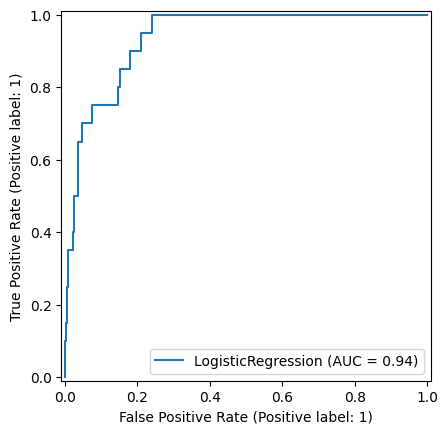

In [98]:
lr_sm = LogisticRegression(max_iter = 5000)
lr_sm.fit(x_train_sc_sm, y_train_sm)

evaluate_model(lr_sm, x_test_sc, y_test)

### Random Forest

In [99]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, class_weight = "balanced", random_state = 42)

rf.fit(x_train_sc, y_train)



,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


 Accuracy: 0.972
 Precision: 1.000
Recall: 0.150
F1-Score: 0.261
 AUC Score: 0.936


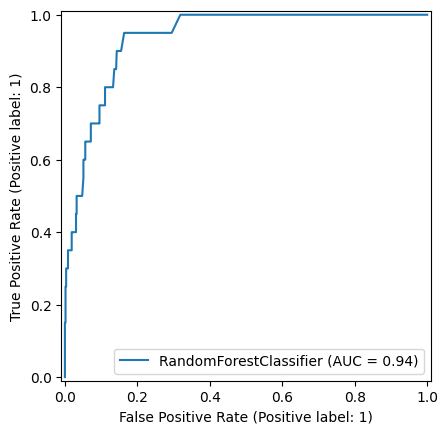

In [104]:
evaluate_model(rf, x_test_sc, y_test)

/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/vincentsmekens/.pyenv/versions/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was 

 Accuracy: 0.967
 Precision: 0.000
Recall: 0.000
F1-Score: 0.000
 AUC Score: 0.563


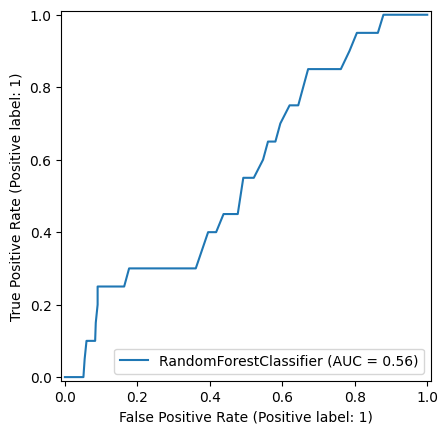

In [113]:
rf_sm = RandomForestClassifier(n_estimators = 500, random_state = 42)

rf_sm.fit(x_train_sc_sm, y_train_sm)
evaluate_model(rf_sm, x_test_sc, y_test)

Note: SMOTE appears to perform worse.


### XGBoost
https://www.geeksforgeeks.org/machine-learning/xgbclassifier/

https://xgboost.readthedocs.io/en/latest/index.html

In [ ]:
from xgboost import XGBClassifier



### To-do list
2. XGBoost
3. XGBoost with SMOTE
4. Importance for each of the model
5. Create some sort of comparison
6. Conlusion